In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df_test = pd.read_csv("test.csv")

In [3]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [30]:
df_train = pd.read_csv("train.csv")

In [31]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


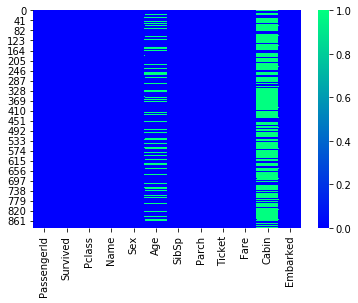

In [7]:
sns.heatmap(df_train.isnull(),cmap = "winter")

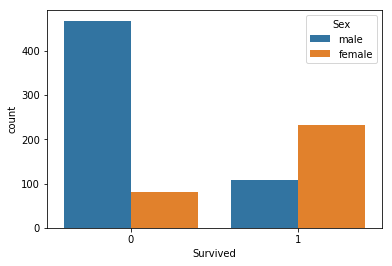

In [8]:
sns.countplot(x = 'Survived', hue = 'Sex', data = df_train)

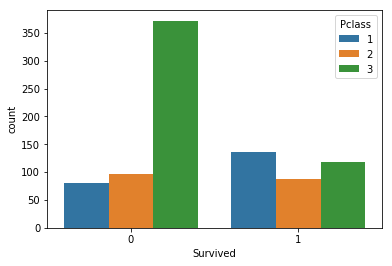

In [9]:
sns.countplot(x = 'Survived', hue = 'Pclass',data = df_train)

In [10]:
df_male = df_train[df_train['Sex'] == 'male']

In [11]:
df_male['Sex'].value_counts()

male    577
Name: Sex, dtype: int64

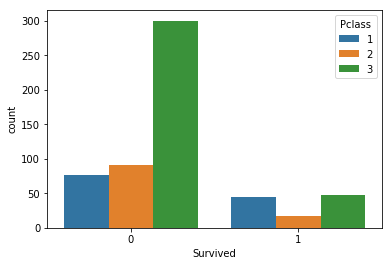

In [12]:
sns.countplot(x = 'Survived', hue = 'Pclass', data = df_male)

In [13]:
df_female = df_train[df_train['Sex'] == 'female']

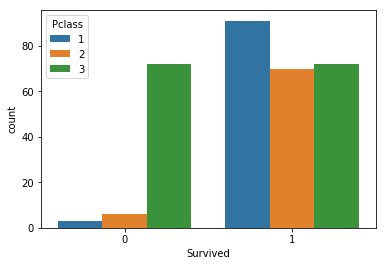

In [14]:
sns.countplot(x = 'Survived', hue = 'Pclass', data = df_female)

In [15]:
df_train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [16]:
#fill in missing age data by finding mean age of passengers by sex and class

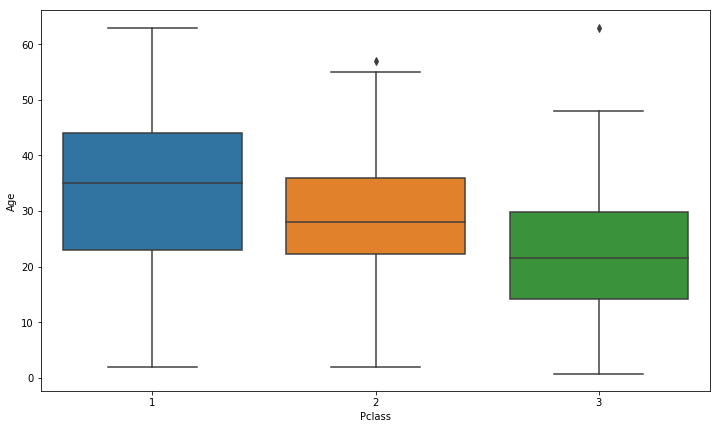

In [17]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y = 'Age', data = df_female)

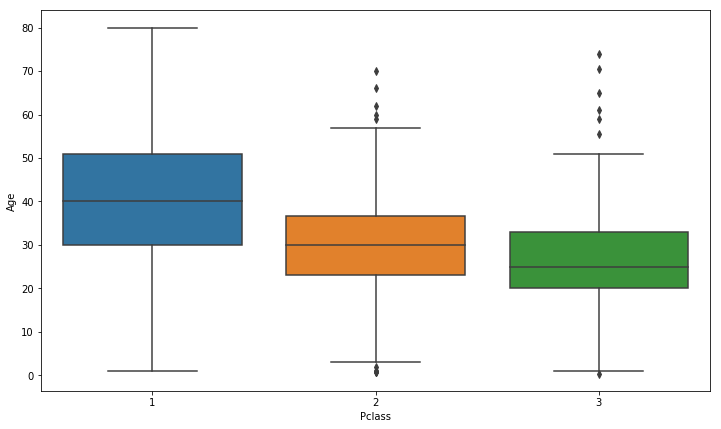

In [18]:
plt.figure(figsize=(12, 7))
sns.boxplot(x = 'Pclass', y = 'Age', data = df_male)

In [19]:
def fill_age_male(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 40

        elif Pclass == 2:
            return 30

        else:
            return 24

    else:
        return Age

In [20]:
def fill_age_female(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 35

        elif Pclass == 2:
            return 28

        else:
            return 24

    else:
        return Age

In [21]:
df_male['Age'] = df_male[['Age','Pclass']].apply(fill_age_male,axis=1)

/home/cam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [22]:
df_female['Age'] = df_female[['Age','Pclass']].apply(fill_age_female,axis = 1)

/home/cam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


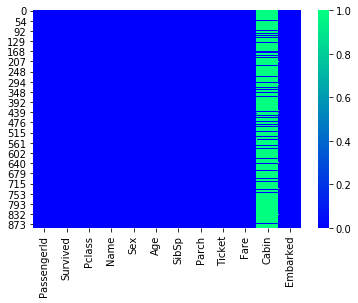

In [23]:
sns.heatmap(data = df_male.isnull(), cmap = 'winter')

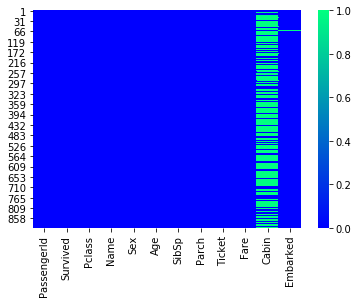

In [24]:
sns.heatmap(data = df_female.isnull(), cmap = 'winter')

In [26]:
df_male.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,24.0,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [27]:
df_female.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [29]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [37]:
df_male = df_male.set_index('PassengerId')

In [38]:
df_male.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,24.0,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [39]:
df_female = df_female.set_index('PassengerId')

In [58]:
df_train2 =pd.concat([df_male, df_female])

In [59]:
df_train2.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,24.0,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [60]:
df_train2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 889
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


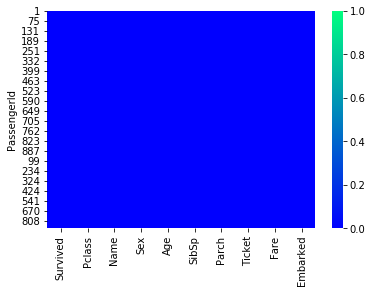

In [65]:
sns.heatmap(df_train2.isnull(),cmap = 'winter')

In [62]:
df_train2.drop('Cabin', axis=1, inplace = True)

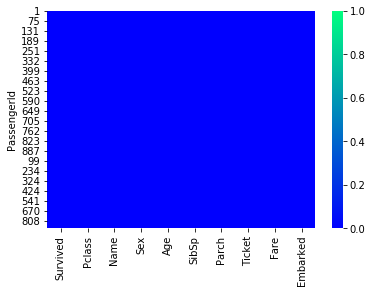

In [64]:
sns.heatmap(df_train2.isnull(),cmap = 'winter')

In [67]:
df_train2.dropna(inplace=True)
df_train2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 1 to 889
Data columns (total 10 columns):
Survived    889 non-null int64
Pclass      889 non-null int64
Name        889 non-null object
Sex         889 non-null object
Age         889 non-null float64
SibSp       889 non-null int64
Parch       889 non-null int64
Ticket      889 non-null object
Fare        889 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 76.4+ KB


In [69]:
sex = pd.get_dummies(df_train2['Sex'],drop_first = True)
embark = pd.get_dummies(df_train2['Embarked'], drop_first = True)

In [70]:
df_train2.drop(['Sex','Embarked','Name','Ticket'], axis = 1, inplace = True)

In [71]:
df_train2 = pd.concat([df_train2,sex,embark],axis=1)

In [72]:
df_train2.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
PassengerId,,,,,,,,,
1,0,3,22.0,1,0,7.2500,1,0,1
5,0,3,35.0,0,0,8.0500,1,0,1
6,0,3,24.0,0,0,8.4583,1,1,0
7,0,1,54.0,0,0,51.8625,1,0,1
8,0,3,2.0,3,1,21.0750,1,0,1


In [73]:
from sklearn.model_selection import train_test_split

In [74]:
X_train,X_test,y_train,y_test = train_test_split(df_train2.drop('Survived',axis = 1),
                                                 df_train2['Survived'], test_size = .3,
                                                 random_state = 101)

In [77]:
from sklearn.linear_model import LogisticRegression

In [83]:
model = LogisticRegression(solver = 'liblinear')
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [84]:
pred = model.predict(X_test)

In [85]:
from sklearn.metrics import classification_report

In [86]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       168
           1       0.76      0.68      0.72        99

    accuracy                           0.80       267
   macro avg       0.79      0.78      0.78       267
weighted avg       0.80      0.80      0.80       267

